<a href="https://colab.research.google.com/github/chogerlate/cpe342-machine-learning-course-kmutt/blob/main/cpe342_a05_1052.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab5 - Introduction to Deep Neural Network
- Siwarat Laoprom, 65070501052
- Name2, Student's ID2

Name your file to 34xx_34xx.ipynb

## Lab Instruction

In this lab, you will learn how to build a simple fully-connected neural network with Keras and Tensorflow as the backend. We will experiment with MNIST data, which is a Keras built-in dataset.

There are three questions to answer in this lab.

See http://yann.lecun.com/exdb/mnist/ for data description.

First, import all of the libraries that will be used in this lab.

In [44]:
import keras
import numpy as np

In [65]:
from keras.datasets import mnist

### Load Data ###
mnist_dataset = mnist.load_data()
#################

### 1. Learn About the Data

Understand your data, such as its shape, format, datatype, structure, distribution, data classes, and so on.

In [66]:
(x_train, y_train), (x_test, y_test) = mnist_dataset

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

print("x_train data type:", x_train.dtype)
print("y_train data type:", y_train.dtype)
print("x_test data type:", x_test.dtype)
print("y_test data type:", y_test.dtype)

print("Number of unique classes in y_train:", len(np.unique(y_train)))
print("Number of unique classes in y_test:", len(np.unique(y_test)))

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)
x_train data type: uint8
y_train data type: uint8
x_test data type: uint8
y_test data type: uint8
Number of unique classes in y_train: 10
Number of unique classes in y_test: 10


In [67]:
# print image value
x_train[0], y_train[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
           0

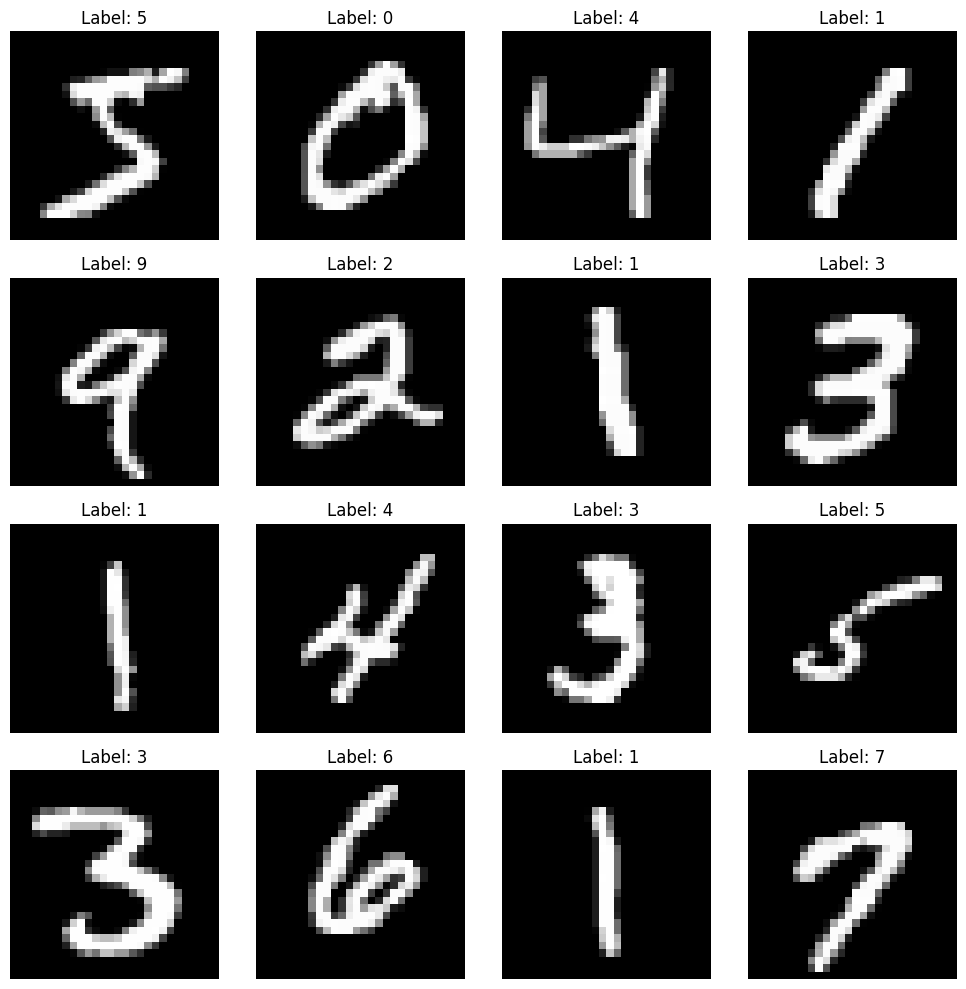

In [68]:
import matplotlib.pyplot as plt

# Function to display a grid of images and labels
def display_image_grid(images, labels, num_rows=4, num_cols=4):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))
    for i in range(num_rows):
        for j in range(num_cols):
            index = i * num_cols + j
            axes[i, j].imshow(images[index], cmap='gray')
            axes[i, j].set_title(f"Label: {labels[index]}")
            axes[i, j].axis('off')
    plt.tight_layout()
    plt.show()

# Display a grid of sample images and labels from the training dataset
display_image_grid(x_train[:16], y_train[:16])

### 2. Build Neural Network Model

Build a two-layer neural network (except for the input and output layers) using `Sequential()`
( See https://keras.io/models/sequential )
> INPUT -> LINEAR -> RELU -> LINEAR -> SOFTMAX

with the hidden layer of size 512.

See Keras Model: https://keras.io/models/about-keras-models/

In [69]:
simple_nn = keras.models.Sequential(
    [
      keras.layers.Dense(512, activation='relu', input_shape=(28 * 28,)),  # First Linear layer with 512 units and ReLU activation
      keras.layers.Dense(10, activation='softmax')  # Second Linear layer with 10 units and Softmax activation
    ]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile your model with the following argument.

```
optimizer='sgd',
loss='categorical_crossentropy',
metrics=['accuracy']
```

In [70]:
simple_nn.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Let's see how our model looks using `.summary()`

In [71]:
simple_nn.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

### 3. Preprocessing

- Reshape (flatten) the features data and normalize the value to be between 0 and 1
- One-hot the target data

In [72]:
from tensorflow.keras.utils import to_categorical

# Normalize and preprocess the data (flatten the images)
x_train = x_train.reshape(-1, 28 * 28) / 255.0  # Flatten each 28x28 image to a 1D vector of 784 pixels
x_test = x_test.reshape(-1, 28 * 28) / 255.0    # Same for the test set

y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

### 4. Model Training

Use `.fit()` to train your neural network model and return a record of accuracy and loss values for each epoch.

We will train the model for 10 epochs (If you are confident in your computer's performance, you can train the model with more epochs.)

We will train using the mini-batch method, with each batch containing 128 data points.

To avoid overfitting with the test set, we will split the current training data into 90% for training and 10% for validating the model.

This will take approximately one minute.

In [73]:
from sklearn.model_selection import train_test_split

x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(
    x_train, y_train_one_hot, test_size=0.1, random_state=42
)

In [74]:
simple_nn_history = simple_nn.fit(x_train_split, y_train_split, epochs=10, batch_size=128, validation_data=(x_val_split, y_val_split))

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5951 - loss: 1.6038 - val_accuracy: 0.8437 - val_loss: 0.6713
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8600 - loss: 0.6046 - val_accuracy: 0.8763 - val_loss: 0.4814
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8836 - loss: 0.4607 - val_accuracy: 0.8900 - val_loss: 0.4114
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8937 - loss: 0.4012 - val_accuracy: 0.9007 - val_loss: 0.3723
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8995 - loss: 0.3717 - val_accuracy: 0.9052 - val_loss: 0.3476
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9034 - loss: 0.3491 - val_accuracy: 0.9095 - val_loss: 0.3277
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9104 - loss: 0.3218 - val_accuracy: 0.9127 - val_loss: 0.3139
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9136 - loss: 0.3116 - val_accuracy: 0

We will plot the loss and accuracy of both the train and validate sets over iterations.

In [75]:
import  matplotlib.pyplot  as plt
%matplotlib inline

In [76]:
# The function argument is the model's history during the training process.
def plot_loss_fn(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

def plot_acc_fn(history):

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

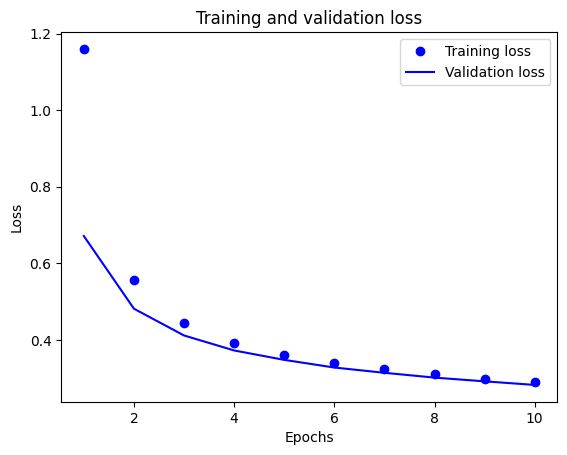

In [77]:
plot_loss_fn(simple_nn_history)

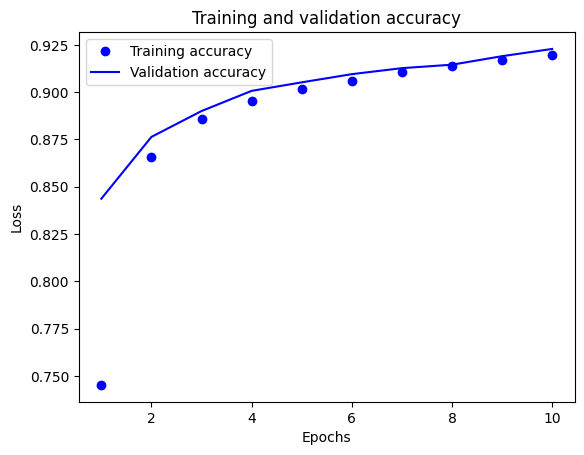

In [78]:
plot_acc_fn(simple_nn_history)

Q: At which iteration does your model start to overfit? Give your rational.

**ANSWER**

From both train/val loss and train/val accuracy graphs showing us that the overfitting likely starts around epoch 7 or 8 because the validation loss stops improving significantly and the training accuracy keeps increasing.
At this point, the model is learning to perform well on the training data but is not generalizing as well to the validation data, which is a classic sign of overfitting.

### 5. Model Evaluation

Evaluate your model with test set using `.evaluate()` and compare the results to those from the training and validate sets. Does your model overfit or underfit? How about the bias and variance?

In [79]:
test_loss, test_acc = simple_nn.evaluate(x_test, y_test_one_hot, verbose=2)

313/313 - 1s - 5ms/step - accuracy: 0.9259 - loss: 0.2727


Q: Analyze the performance of your model using a confusion matrix. Which class does your model frequently misclassify? What is the precision and recall of your model?

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


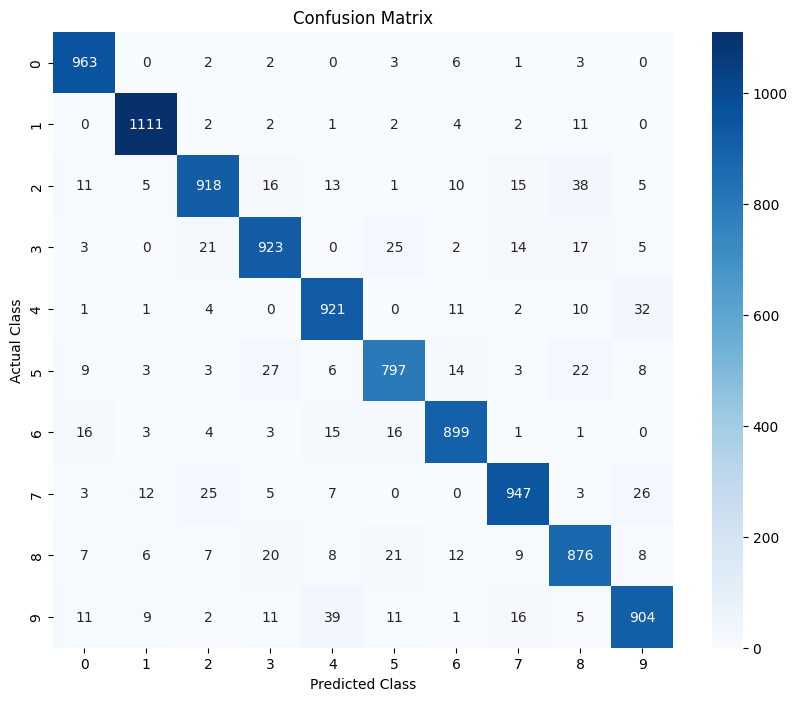

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.97      0.98      0.97      1135
           2       0.93      0.89      0.91      1032
           3       0.91      0.91      0.91      1010
           4       0.91      0.94      0.92       982
           5       0.91      0.89      0.90       892
           6       0.94      0.94      0.94       958
           7       0.94      0.92      0.93      1028
           8       0.89      0.90      0.89       974
           9       0.91      0.90      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.92     10000
weighted avg       0.93      0.93      0.93     10000



In [80]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

### evaluate your model ###
y_pred = simple_nn.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

# Print classification report
print(classification_report(y_test,y_pred_classes))
###########################


**ANSWER**

- The model frequently misclassifies class 2 and 5 based on the lowest recall value (0.89).
- The precision and recall of the model overall are quite good, with an accuracy of 0.93. However, certain classes like 5, 9, and 2 could benefit from further improvements, especially in recall.

### 6. Model tuning

Try tuning your model by:
1. Adjust the learning rate of your optimizer by increasing and decreasing the learning rate to see how it affects your model.
2. Experiment with different optimizers ('sgd', 'rmspop', 'adagrad', 'adam', See https://keras.io/optimizers ) to see which one converges faster.
3. Change the structure of your model by adding more hidden layers with any number of nodes, and then observe how this affects your model.

In [37]:
from tensorflow.keras.optimizers import Adam
tuned_nn = keras.models.Sequential([
    keras.layers.Dense(512, input_shape=(28 * 28,)),  # First Dense layer with 512 units
    keras.layers.LeakyReLU(alpha=0.01),               # Leaky ReLU activation
    keras.layers.Dense(10, activation='softmax')      # Output layer with 10 units and softmax activation
])
optimizer = Adam(learning_rate=1e-4)
tuned_nn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tuned_nn.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from sklearn.model_selection import train_test_split

x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(
    x_train, y_train, test_size=0.1, random_state=42
)

In [38]:
tuned_nn_history = tuned_nn.fit(x_train_split, y_train_split, epochs=10, batch_size=512, validation_data=(x_val_split, y_val_split))

Epoch 1/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.7844 - loss: 0.7782 - val_accuracy: 0.9370 - val_loss: 0.2278
Epoch 2/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9409 - loss: 0.2108 - val_accuracy: 0.9575 - val_loss: 0.1574
Epoch 3/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9617 - loss: 0.1413 - val_accuracy: 0.9652 - val_loss: 0.1241
Epoch 4/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9700 - loss: 0.1083 - val_accuracy: 0.9710 - val_loss: 0.1072
Epoch 5/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9769 - loss: 0.0849 - val_accuracy: 0.9740 - val_loss: 0.0955
Epoch 6/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9810 - loss: 0.0695 - val_accuracy: 0.9753 - val_loss: 0.0844
Epoch 7/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9865 - loss: 0.0528 - val_accuracy: 0.9775 - val_loss: 0.0803
Epoch 8/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9864 - loss: 0.0492 - val_accu

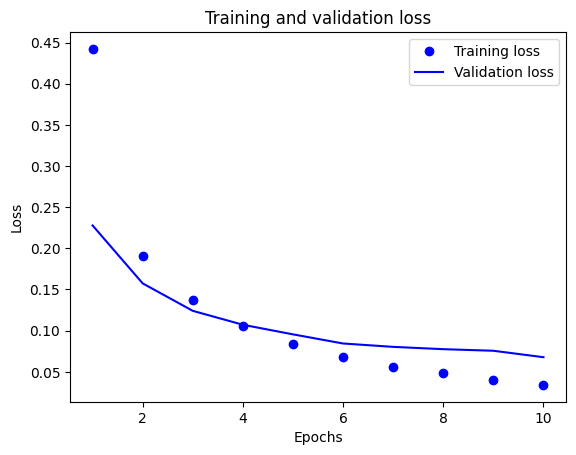

In [39]:
plot_loss_fn(tuned_nn_history)

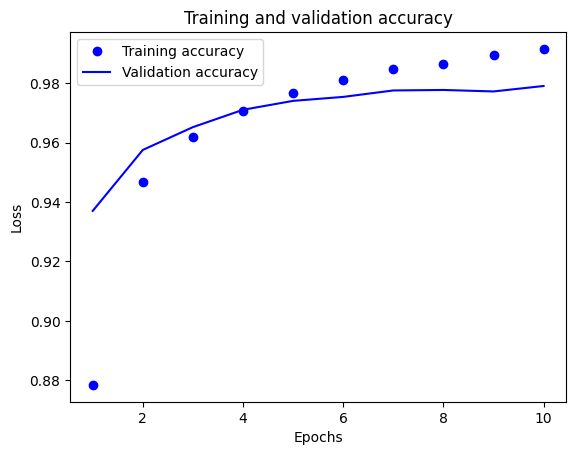

In [40]:
plot_acc_fn(tuned_nn_history)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


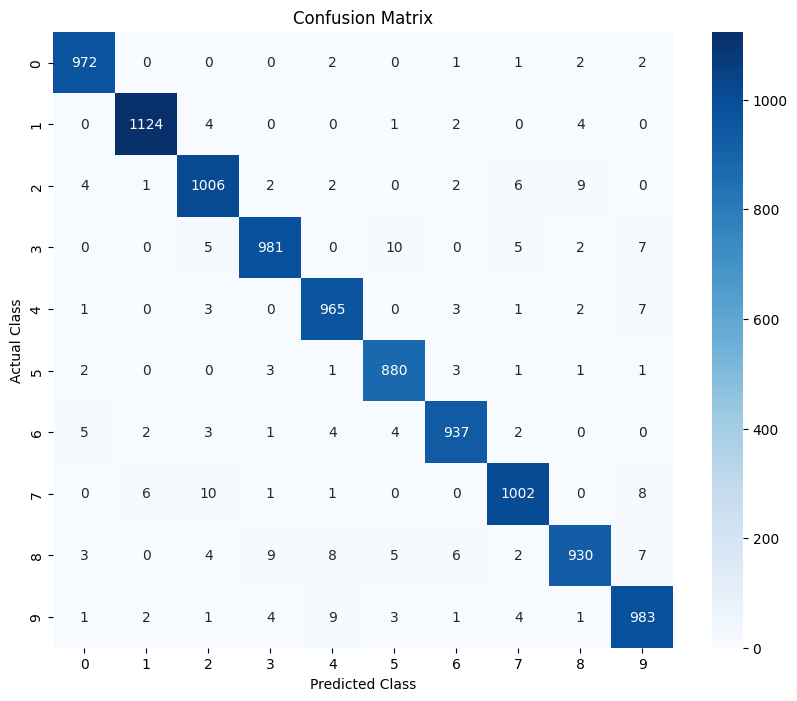

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.98      0.97      0.98      1010
           4       0.97      0.98      0.98       982
           5       0.97      0.99      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.98      0.95      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [41]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

### evaluate your model ###
y_pred = tuned_nn.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

# Print classification report
print(classification_report(y_test,y_pred_classes))
###########################

### 7. Discussion and Result
Q: Write down your findings from the previous step.

**ANSWER**

After making the following modifications:

    Change activation function from ReLU to Leaky ReLU with alpha = 0.01.
    Change optimizer to Adam with a learning rate of 1e-4.
    Change loss function from categorical_crossentropy to sparse_categorical_crossentropy
    Increase training batch size

The model was trained for 10 epochs, and the results indicate significant improvements in performance.

Conclusion:

    The model now achieves excellent performance on the MNIST dataset with an accuracy of 98% and very high precision, recall, and F1-scores across all classes.
    The changes in activation function (Leaky ReLU) and optimization strategy (Adam with a lower learning rate) appear to have been highly effective, improving both the model’s generalization capability and preventing overfitting.

Discuss:
    Based on the results and graphs, there is no clear sign of overfitting, and the model has learned effectively with good generalization.